### import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy import signal
from scipy.integrate import trapz
from scipy.interpolate import interp1d
import seaborn as sns

### load data frame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/final-project-tesis/DATA/DATA_NEW.csv', encoding='utf-8')
df1 = dff[['HR_KUBIOS',	'HR_BEATS',	'RR_MS', 'RMSSD',	'STD_HR',	'STD_RR','VLF_MS2','LF_MS2', 'TOTAL_MS2','LF_PER_HF','VLF_HZ','LF_HZ','HF_HZ','LF_NU','HF_NU', 'class'	]]
df1.head()

,HR_KUBIOS,HR_BEATS,RR_MS,RMSSD,STD_HR,STD_RR,VLF_MS2,LF_MS2,TOTAL_MS2,LF_PER_HF,VLF_HZ,LF_HZ,HF_HZ,LF_NU,HF_NU,class
0,58.770,58.77,1021.66,30.930,1.731,28.33,1.32,2.96,7.17,1.03,0.03,0.06,0.31,50.66,49.34,1
1,60.310,60.48,994.72,62.190,3.270,49.91,0.61,2.47,14.28,0.22,0.03,0.14,0.17,18.10,81.90,1
2,61.114,61.17,981.76,26.855,1.820,29.94,0.53,6.37,8.16,5.03,0.03,0.09,0.22,83.43,16.57,1
3,59.710,59.71,1004.78,10.870,0.540,9.26,0.00,0.42,0.59,2.43,0.00,0.09,0.31,70.87,29.13,1
4,77.480,77.48,774.34,7.970,0.490,4.95,0.00,0.01,0.09,0.13,0.00,0.06,0.35,11.40,88.60,1


### normalisasi

In [ ]:
#function of normalization
def norm (x):
  #from sklearn import preprocessing
  import numpy as np
  hasil = (x-x.min())/(x.max()-x.min())
  return(hasil)

In [ ]:
# normalisasi data
df = norm(df1)
# menampilkan data
df.head()

,HR_KUBIOS,HR_BEATS,RR_MS,RMSSD,STD_HR,STD_RR,VLF_MS2,LF_MS2,TOTAL_MS2,LF_PER_HF,VLF_HZ,LF_HZ,HF_HZ,LF_NU,HF_NU,class
0,0.144780,0.206826,0.499039,0.019620,0.010583,0.023927,0.025162,0.013954,0.007428,0.055948,0.75,0.181818,0.64,0.534106,0.465894,1.0
1,0.153873,0.213289,0.480546,0.039449,0.019991,0.042154,0.011628,0.011644,0.014793,0.011950,0.75,0.909091,0.08,0.190828,0.809172,1.0
2,0.158621,0.215897,0.471650,0.017035,0.011127,0.025287,0.010103,0.030030,0.008453,0.273221,0.75,0.454545,0.28,0.879599,0.120401,1.0
3,0.150331,0.210379,0.487452,0.006895,0.003301,0.007821,0.000000,0.001980,0.000611,0.131993,0.00,0.454545,0.64,0.747180,0.252820,1.0
4,0.255255,0.277545,0.329270,0.005056,0.002996,0.004181,0.000000,0.000047,0.000093,0.007061,0.00,0.181818,0.80,0.120190,0.879810,1.0


In [ ]:
df.min()

HR_KUBIOS    0.0
HR_BEATS     0.0
RR_MS        0.0
RMSSD        0.0
STD_HR       0.0
STD_RR       0.0
VLF_MS2      0.0
LF_MS2       0.0
TOTAL_MS2    0.0
LF_PER_HF    0.0
VLF_HZ       0.0
LF_HZ        0.0
HF_HZ        0.0
LF_NU        0.0
HF_NU        0.0
class        0.0
dtype: float64

In [ ]:
df.max()

HR_KUBIOS    1.0
HR_BEATS     1.0
RR_MS        1.0
RMSSD        1.0
STD_HR       1.0
STD_RR       1.0
VLF_MS2      1.0
LF_MS2       1.0
TOTAL_MS2    1.0
LF_PER_HF    1.0
VLF_HZ       1.0
LF_HZ        1.0
HF_HZ        1.0
LF_NU        1.0
HF_NU        1.0
class        1.0
dtype: float64

In [ ]:
dfx1 = df[['HR_KUBIOS',	'HR_BEATS',	'RR_MS', 'RMSSD',	'STD_HR',	'STD_RR','VLF_MS2','LF_MS2', 'TOTAL_MS2','LF_PER_HF','VLF_HZ','LF_HZ','HF_HZ','LF_NU','HF_NU']]
dfy = df[['class']].values

### spliting data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]
y = df[['class']].values.ravel()

In [ ]:
# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### model

In [ ]:
# function check metrix evalute
from sklearn.metrics import confusion_matrix, classification_report

def evaluation(name, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'{name.upper()} TRAINING RESULT:')
    print('======================================================')
    print('Accuracy:', model.score(X_train, y_train))
    print('======================================================')
    print('Classification Report --------------------------------')
    print(classification_report(y_train, y_train_pred))
    print('======================================================')
    print('Confussion Matrix ------------------------------------')
    print(confusion_matrix(y_train, y_train_pred))

    print('\n======================================================')

    print(f'\n {name.upper()} TESTING RESULT:')
    print('======================================================')
    print('Accuracy:', model.score(X_test, y_test))
    print('======================================================')
    print('Classification Report --------------------------------')
    print(classification_report(y_test, y_test_pred))
    print('======================================================')
    print('Confussion Matrix ------------------------------------')
    print(confusion_matrix(y_test, y_test_pred))

In [ ]:
# Function Evaluate score (accuracy)
def evaluate_model(model_dict):
    frame = pd.DataFrame(columns=['Training','Testing'])
    
    for name, model in model_dict.items():
        frame.loc[name, 'Training'] = model.score(X_train, y_train)
        frame.loc[name, 'Testing'] = model.score(X_test, y_test)
        
    return frame

In [ ]:
# Feature Importance (Random Forest)
def feature_importance(model_rf):
    X_ = np.array(X)
    importance_scores = model_rf.feature_importances_
    indices = np.argsort(importance_scores)

    plt.figure(figsize=(15, 10))
    feature_importances = pd.Series(model.feature_importances_, index=[X])
    feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
    plt.title('Feature Importance using Random Forest')
    plt.show()

In [ ]:
# Function Confusion Matrix
def check_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(15, 8))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()

In [ ]:
# Function Evaluate score (accuracy)
def evaluate_model(model_dict):
    frame = pd.DataFrame(columns=['Training','Testing'])
    
    for name, model in model_dict.items():
        frame.loc[name, 'Training'] = model.score(X_train, y_train)
        frame.loc[name, 'Testing'] = model.score(X_test, y_test)
        
    return frame

### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_depth=100,criterion='gini', random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [ ]:
model_dict = {
    'Random Forest' : model_rf
}

evaluate_model(model_dict)

,Training,Testing
Random Forest,0.988506,0.715909


In [ ]:
nama = 'Random Forest'.upper()
model = model_rf

evaluation(nama, model)

RANDOM FOREST TRAINING RESULT:
Accuracy: 0.9885057471264368
Classification Report --------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

Confussion Matrix ------------------------------------
[[133   4]
 [  0 211]]


 RANDOM FOREST TESTING RESULT:
Accuracy: 0.7159090909090909
Classification Report --------------------------------
              precision    recall  f1-score   support

         0.0       0.67      0.57      0.62        35
         1.0       0.74      0.81      0.77        53

    accuracy                           0.72        88
   macro avg       0.70      0.69      0.70        88
weighted avg       0.71      0.72      0.71        88

Confussion Matrix ------------------

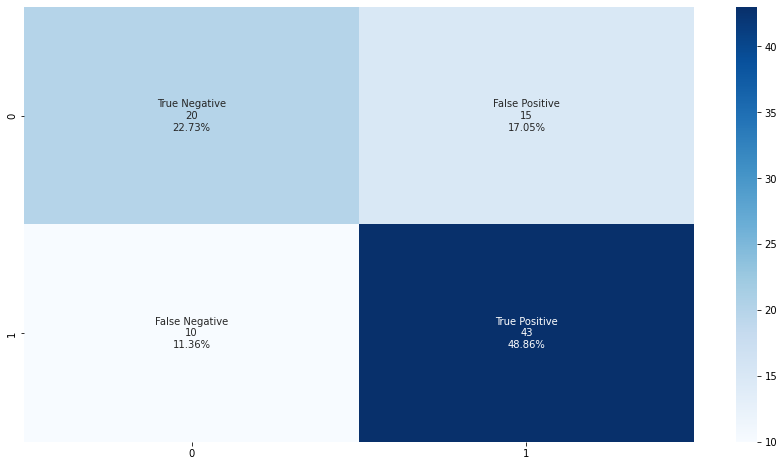

In [ ]:
check_confusion_matrix(model)

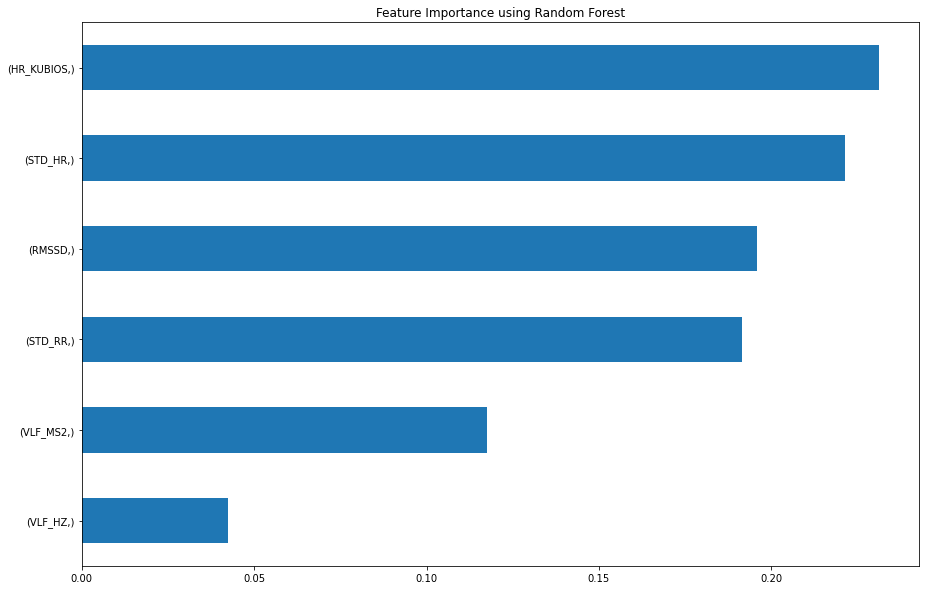

In [ ]:
feature_importance(model)